## **Fashion Visual Search & Intelligent Styling Assistant**

The global fashion e-commerce market faces a critical challenge: 65% of potential customers abandon their shopping journey because they cannot find the specific items they're looking for. Traditional text-based search fails to capture the nuanced visual elements that drive fashion purchases - color shades, patterns, textures, and styling details that are difficult to describe in words.

### Problem Statement
* Retrieve visually similar products from inventory

* Recommend outfits that go well with the item

* Provide personalized suggestions based on user behavior

#### Import Necessery Library

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import zipfile
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#### **Data Collection**

In [2]:
datad = pd.read_csv('.\dresses_bd_processed_data.csv')
dataj =pd.read_csv('.\jeans_bd_processed_data.csv')


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\j'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\j'
C:\Users\satya\AppData\Local\Temp\ipykernel_13476\961530647.py:1: SyntaxWarning: invalid escape sequence '\d'
  datad = pd.read_csv('.\dresses_bd_processed_data.csv')
C:\Users\satya\AppData\Local\Temp\ipykernel_13476\961530647.py:2: SyntaxWarning: invalid escape sequence '\j'
  dataj =pd.read_csv('.\jeans_bd_processed_data.csv')


#### **Combine both datasets into a single master catalog:**

In [3]:
data = pd.concat([datad, dataj], ignore_index=True)

## **Basic Check**

In [4]:
data.head()

,selling_price,discount,category_id,meta_info,product_id,pdp_url,sku,brand,department_id,last_seen_date,launch_on,mrp,product_name,feature_image_s3,channel_id,feature_list,description,style_attributes,pdp_images_s3
0,{'INR': 474848.9539},0.0,30,Slim fit. Designed to hit at the ankle. UK siz...,b613d7b5dfe86f3e695d931d31fd729fdf44e181f14079...,https://www.ralphlauren.co.uk/en/kristian-silk...,479495,RALPH LAUREN,2,2025-05-01,2020-02-29,{'INR': 474848.9539},Kristian Silk Tuxedo Dress,https://gallery.stylumia.com/originals/2020/02...,14,"['Slim fit. Designed to hit at the ankle.', 'U...",The Kristian evening dress is informed by the ...,{},['https://gallery.stylumia.com/originals/2020/...
1,{'INR': 464648.6919},0.0,30,Slim fit. Designed to hit at the ankle. UK siz...,482b10a23f8d00cfc7c9bbeeac4e26d25dd303d8e62e97...,https://www.ralphlauren.co.uk/en/kristian-silk...,502670,RALPH LAUREN,2,2025-05-08,2020-02-29,{'INR': 464648.6919},Kristian Silk Tuxedo Dress,https://gallery.stylumia.com/originals/2020/02...,14,"['Slim fit. Designed to hit at the ankle.', 'U...",The Kristian evening dress is informed by the ...,{},['https://gallery.stylumia.com/originals/2020/...
2,{'INR': 29496.0812},0.0,30,Fit-and-flare silhouette. Intended to hit at t...,3508b052ef7a5eea820423b97713612bc92a3f2301a3d3...,https://www.ralphlauren.co.uk/en/fit-and-flare...,478766,RALPH LAUREN,2,2025-05-08,2020-02-29,{'INR': 29496.0812},Fit-and-Flare Shirtdress,https://gallery.stylumia.com/originals/2020/02...,14,['Fit-and-flare silhouette. Intended to hit at...,Airy georgette and a flattering fit-and-flare ...,{},['https://gallery.stylumia.com/originals/2020/...
3,{'INR': 17156.9392},0.0,30,"Fits true to size; take your normal size, Stra...",6360245240b68885bd4dbcef8d8856c0fb13f1314769f5...,https://www.anthropologie.com/shop/adena-crepe...,50297209_041,BHLDN,2,2025-01-31,2020-05-27,{'INR': 17156.9392},Adena Crepe Dress,https://gallery.stylumia.com/originals/2020/05...,48,"['Back zip', 'Polyester; polyester lining', 'P...","A sleek square neckline tops this stretchy, bo...","{'modelNotes': '', 'dimensions': 'Fits true to...",['https://gallery.stylumia.com/originals/2020/...
4,{'INR': 26079.5467},0.0,30,Fit-and-flare silhouette Designed to hit at th...,5d07037957e64d1e218499cb7d7a8e5e57aa59249bb806...,https://www.ralphlauren.co.uk/en/belted-cotton...,478750,RALPH LAUREN,2,2025-05-08,2021-02-12,{'INR': 26079.5467},Belted Cotton-Blend Shirtdress,https://gallery.stylumia.com/originals/2021/02...,14,['Fit-and-flare silhouette Designed to hit at ...,This iteration of Lauren's iconic shirtdress i...,{},['https://gallery.stylumia.com/originals/2021/...


In [5]:
datad.shape

(14609, 19)

In [6]:
dataj.shape

(2874, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17483 entries, 0 to 17482
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     17483 non-null  object 
 1   discount          17483 non-null  float64
 2   category_id       17483 non-null  int64  
 3   meta_info         17412 non-null  object 
 4   product_id        17483 non-null  object 
 5   pdp_url           17483 non-null  object 
 6   sku               17483 non-null  object 
 7   brand             17483 non-null  object 
 8   department_id     17483 non-null  int64  
 9   last_seen_date    17483 non-null  object 
 10  launch_on         17483 non-null  object 
 11  mrp               17483 non-null  object 
 12  product_name      17483 non-null  object 
 13  feature_image_s3  17483 non-null  object 
 14  channel_id        17483 non-null  int64  
 15  feature_list      17483 non-null  object 
 16  description       11585 non-null  object

In [8]:
data.describe()

,discount,category_id,department_id,channel_id
count,17483.000000,17483.000000,17483.0,17483.000000
mean,15.379066,34.274095,2.0,175.161414
std,23.169270,9.636591,0.0,154.499090
min,0.000000,30.000000,2.0,7.000000
25%,0.000000,30.000000,2.0,48.000000
50%,0.000000,30.000000,2.0,48.000000
75%,40.000000,30.000000,2.0,367.000000
max,99.900000,56.000000,2.0,384.000000


In [9]:
data.describe(include='object')

,selling_price,meta_info,product_id,pdp_url,sku,brand,last_seen_date,launch_on,mrp,product_name,feature_image_s3,feature_list,description,style_attributes,pdp_images_s3
count,17483,17412,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,11585,17483,17483
unique,5468,15719,17474,17453,17474,720,162,792,4851,12553,17474,11760,8981,12398,17474
top,{'INR': 20988.364},Main: 36% Polyester 33% Viscose/Rayon 26% Poly...,ea1e00946ad0bc9b6096a1feed7b2fb0ea4c92a928662e...,https://www.karenmillen.com/figure-form-bandag...,1316049ATX,KarenMillen,2025-05-02,2025-04-15,{'INR': 20988.364},LADIES` DRESS,https://gallery.stylumia.com/originals/2024/10...,[],Made in Italy,{},['https://gallery.stylumia.com/originals/2024/...
freq,193,14,2,3,2,4325,2671,506,193,113,2,3006,234,2812,2


In [10]:
data['category_id'].unique()

array([30, 56], dtype=int64)

## **Domain Analysis**

* **selling_price:** The current selling price of the product, usually in INR (Indian Rupees), stored as a dictionary with the currency key.
* **discount:** The discount percentage applied on the product’s MRP (Maximum Retail Price).
* **category_id:** Numeric identifier for the product category (e.g., dresses).
* **meta_info:** Short descriptive text about the product’s fit, style, size guide, or other key selling points.
* **product_id:** A unique hash-based identifier for each product.
* **pdp_url:** URL to the product detail page on the retailer’s website.
* **sku:** Stock Keeping Unit, a unique product code used for inventory management.
* **brand:** Brand name of the product.
* **department_id:** Numeric code indicating the broader department the product belongs to (e.g., women’s apparel).
* **last_seen_date:** The most recent date when the product was observed or crawled on the retailer’s site.
* **launch_on:** The date when the product was first launched or added to the inventory.
* **mrp:** The Maximum Retail Price of the product, stored as a dictionary with currency information.
* **product_name:** The commercial name/title of the product.
* **feature_image_s3:** URL link to the main product image hosted on the Stylumia image storage.(use this url if you want to download images )
* **channel_id:** Numeric ID representing the retailer.
* **feature_list:** List of key features and design attributes of the product.
* **description:** Detailed textual description of the product, including style, usage, and other marketing information.
* **style_attributes:** A JSON/dictionary containing additional style metadata.
* **pdp_images_s3:** List of URLs for additional product images stored on the Stylumia image repository. (use this url if you want to download images )


## **Data Cleaning**

In [11]:
import pandas as pd
import ast

# Extract numeric price from stringified dict in 'selling_price' and 'mrp'
def extract_price(val):
    try:
        if isinstance(val, str):
            val_dict = ast.literal_eval(val)
            return list(val_dict.values())[0]
        elif isinstance(val, dict):
            return list(val.values())[0]
    except:
        return None

# Apply to DataFrame
data['selling_price_value'] = data['selling_price'].apply(extract_price)
data['mrp_value'] = data['mrp'].apply(extract_price)

# Calculate discount percentage
data['discount_pct'] = ((data['mrp_value'] - data['selling_price_value']) / data['mrp_value']) * 100


#### **Handle Missing Values**

In [12]:
# Drop rows with missing prices (essential for price analysis)
data = data.dropna(subset=['selling_price_value', 'mrp_value'])

# Fill missing descriptions
data['description'] = data['description'].fillna('No description available')


#### **Encode Category Labels**

In [13]:
data['category'] = data['category_id'].map({30: 'dress', 56: 'jeans'})

## **Exploratory Data Analysis**

### **Univariate Analysis**

Understand distribution of individual features (price, category, etc.)



C:\Users\satya\AppData\Local\Temp\ipykernel_13476\3265958528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=data,palette='viridis')


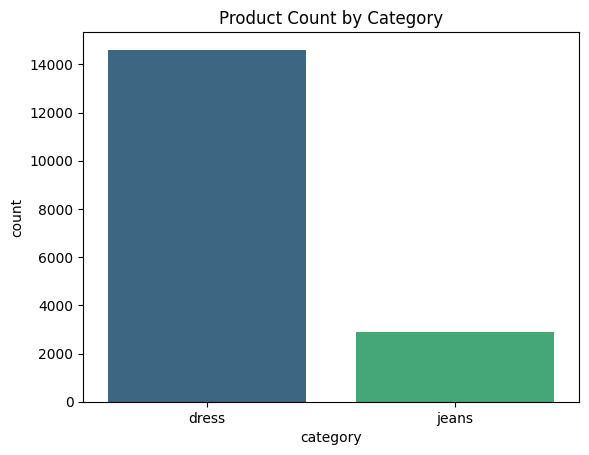

In [14]:
# Product count per category
sns.countplot(x='category', data=data,palette='viridis')
plt.title("Product Count by Category")
plt.show()

* Dresses dominate the dataset, with over 14,000 entries, whereas jeans have less than 3,000.

* This shows a clear imbalance in product distribution, where dresses are significantly more represented.

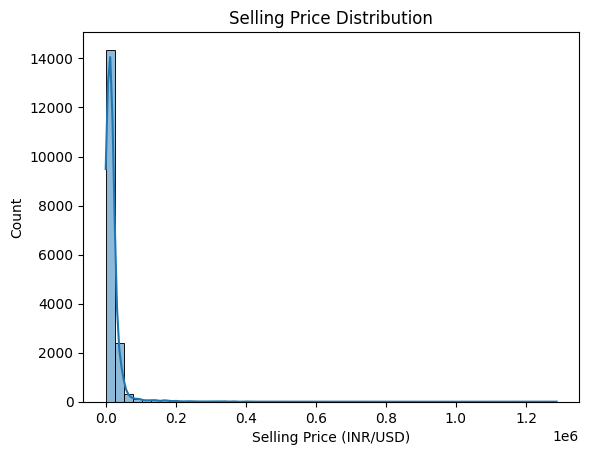

In [15]:
# Selling price distribution
sns.histplot(data['selling_price_value'], bins=50, kde=True)
plt.title("Selling Price Distribution")
plt.xlabel("Selling Price (INR/USD)")
plt.show()

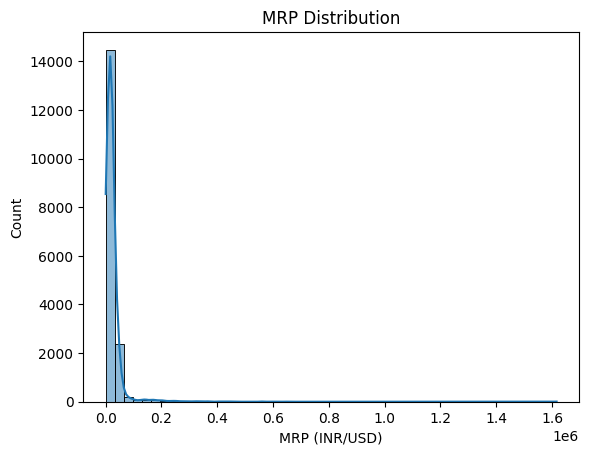

In [16]:
# MRP distribution
sns.histplot(data['mrp_value'], bins=50, kde=True)
plt.title("MRP Distribution")
plt.xlabel("MRP (INR/USD)")
plt.show()

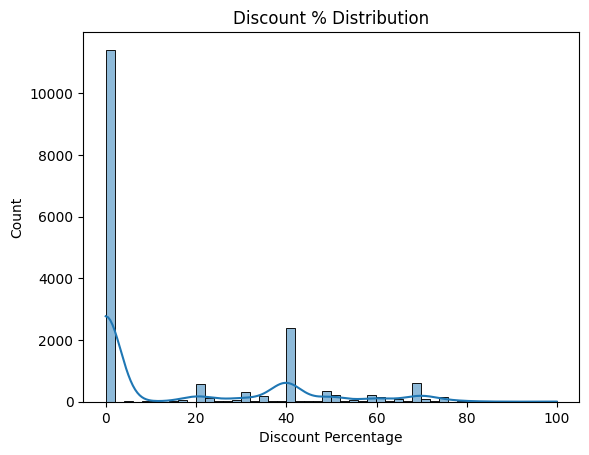

In [17]:

# Discount percentage
sns.histplot(data['discount_pct'], bins=50, kde=True)
plt.title("Discount % Distribution")
plt.xlabel("Discount Percentage")
plt.show()

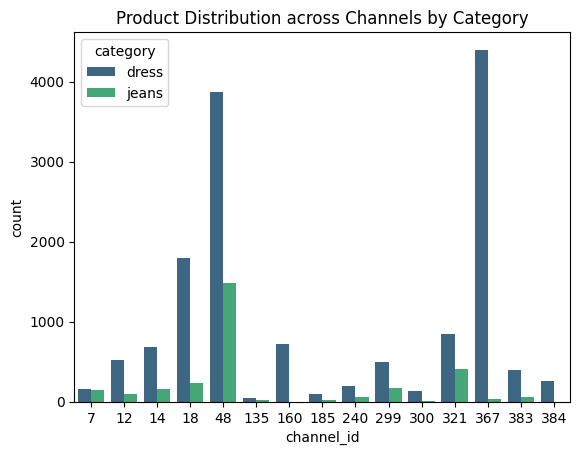

In [18]:
# To understand the distribution of products across sales channels by category.
sns.countplot(x='channel_id', hue='category', data=data,palette='viridis')
plt.title('Product Distribution across Channels by Category')
plt.show()

### **Bivariate Analysis**
Bivariate	Explore relationships between two features (e.g., MRP vs selling price)


C:\Users\satya\AppData\Local\Temp\ipykernel_13476\2715079291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index,palette='viridis')


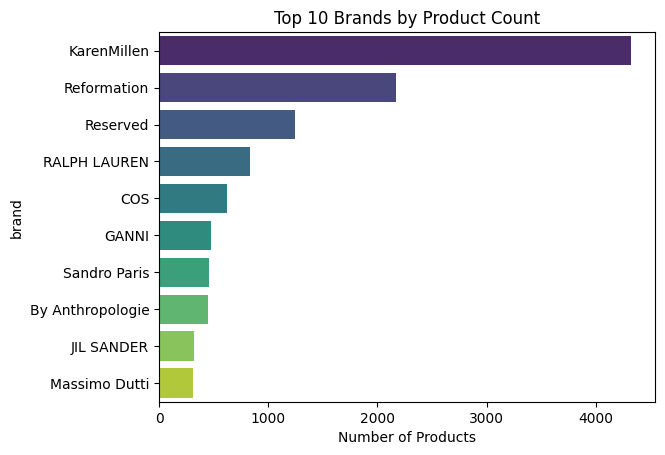

In [19]:
# Brand frequency
top_brands = data['brand'].value_counts().nlargest(10)
sns.barplot(x=top_brands.values, y=top_brands.index,palette='viridis')
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Number of Products")
plt.show()

*  KarenMillen has the highest number of products, followed by Reformation and Reserved.

C:\Users\satya\AppData\Local\Temp\ipykernel_13476\2581201340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_brand.values, y=avg_price_by_brand.index,palette='viridis')


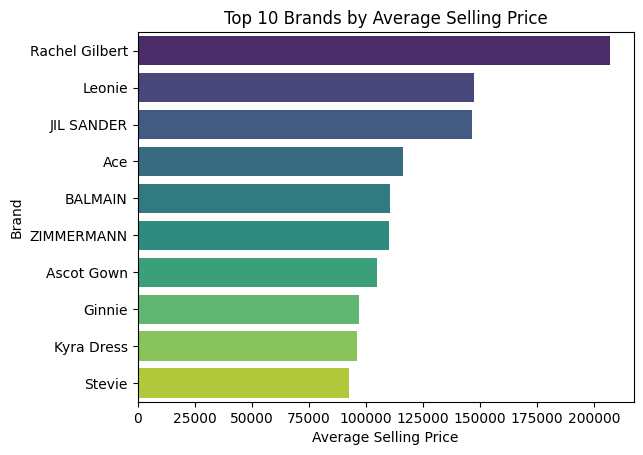

In [20]:
# Average Selling Price by Brand (Top 10)
# Compare which brands have higher average selling prices.
avg_price_by_brand = data.groupby('brand')['selling_price_value'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_by_brand.values, y=avg_price_by_brand.index,palette='viridis')
plt.title('Top 10 Brands by Average Selling Price')
plt.xlabel('Average Selling Price')
plt.ylabel('Brand')
plt.show()

*  Rachel Gilbert has the highest average selling price, followed by Leonie and JIL SANDER.

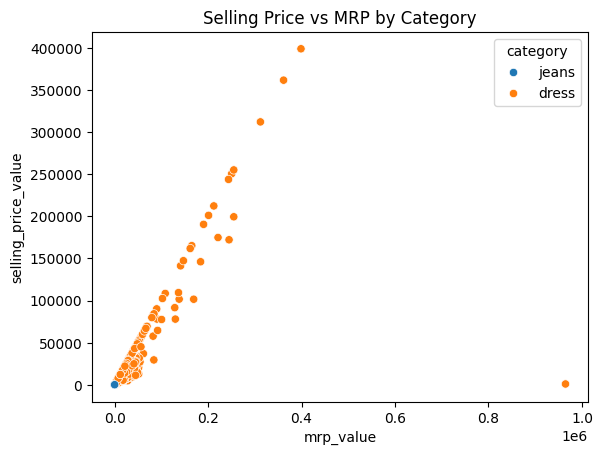

In [21]:
# Selling Price vs MRP
sns.scatterplot(x='mrp_value', y='selling_price_value', hue='category', data=data.sample(1000))
plt.title("Selling Price vs MRP by Category")
plt.show()

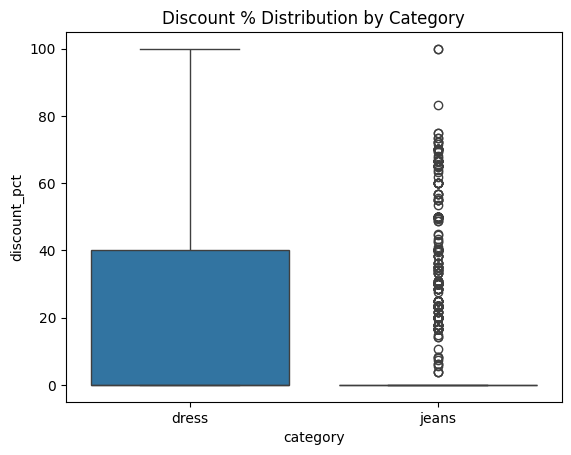

In [22]:
# Discount by Category
sns.boxplot(x='category', y='discount_pct', data=data)
plt.title("Discount % Distribution by Category")
plt.show()

C:\Users\satya\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\satya\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\satya\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\satya\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


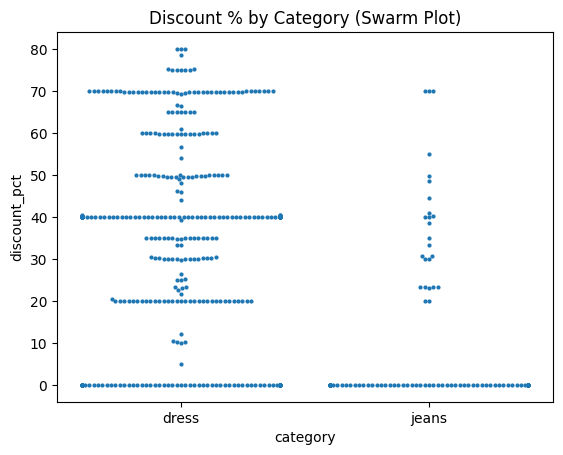

In [23]:
# Discount Percentage vs Category with Swarm Plot
# Visualize individual discount points per category
sns.swarmplot(x='category', y='discount_pct', data=data.sample(1000), size=3)
plt.title('Discount % by Category (Swarm Plot)')
plt.show()

* Dresses show a wide range of discounts, with many items between 20% and 70%.

* Jeans have fewer discounts, and they tend to be clustered below 30%, with some going as high as ~75%.

* There is a noticeable zero-discount cluster in both categories, but dresses receive more aggressive markdowns overall.

### **Multivariate Analysis**
Multivariate	Understand interactions involving more than two variables (brand, time)


In [24]:
# Convert 'launch_on' to datetime
data['launch_on'] = pd.to_datetime(data['launch_on'], errors='coerce')

# Create launch year
data['launch_year'] = data['launch_on'].dt.year

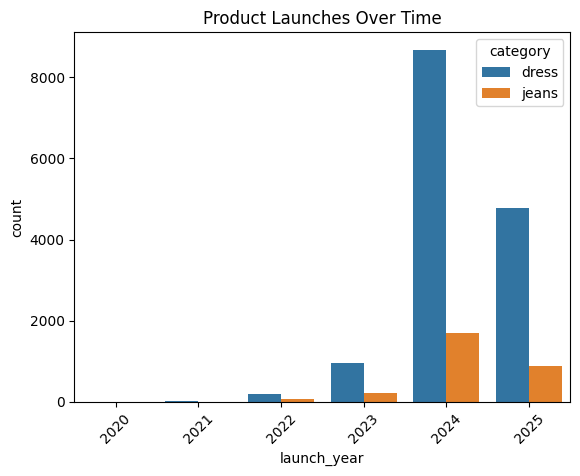

In [25]:
# Launch trend over time
sns.countplot(x='launch_year', hue='category', data=data)
plt.title("Product Launches Over Time")
plt.xticks(rotation=45)
plt.show()

* Dresses saw a big launch spike in 2024, followed by a good number in 2025.
* Jeans were also launched more frequently from 2023 onwards.

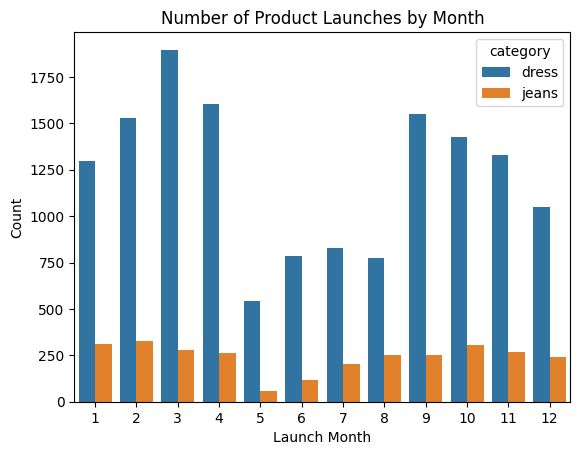

In [26]:
# Launch Month Distribution
# Detect seasonality or popular launch months.
data['launch_month'] = data['launch_on'].dt.month
sns.countplot(x='launch_month', hue='category', data=data)
plt.title('Number of Product Launches by Month')
plt.xlabel('Launch Month')
plt.ylabel('Count')
plt.show()

*  Dresses were mostly launched in March, April, and September, showing strong seasonal trends.
* Jeans had fewer launches overall but stayed somewhat steady, with small peaks in January and October.

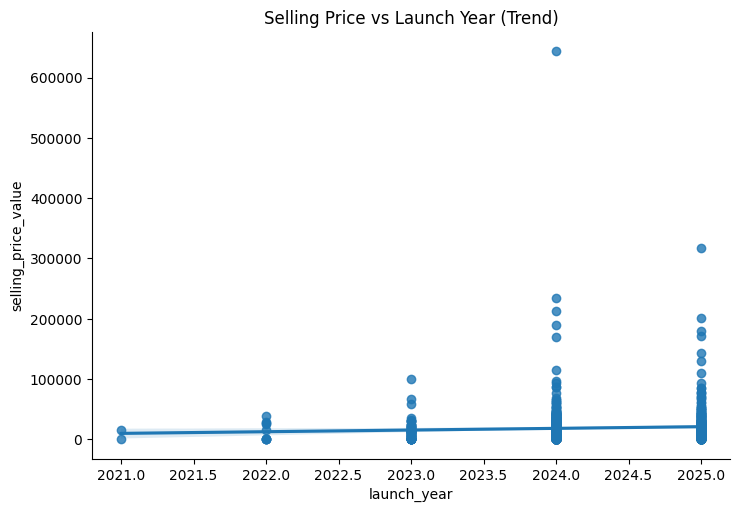

In [27]:
# Price vs Launch Year Scatter with Trendline
# Understand how price trends evolved over the years.
sns.lmplot(x='launch_year', y='selling_price_value', data=data.sample(1000), aspect=1.5)
plt.title('Selling Price vs Launch Year (Trend)')
plt.show()

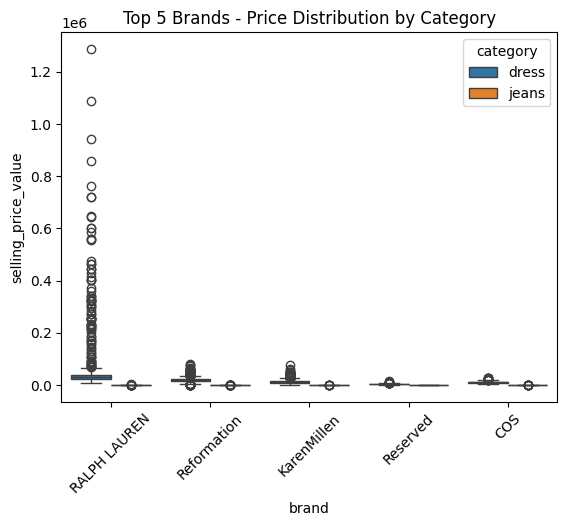

In [28]:
# Price vs Brand vs Category (Top 5 brands)
top_brands = data['brand'].value_counts().nlargest(5).index
filtered = data[data['brand'].isin(top_brands)]

sns.boxplot(x='brand', y='selling_price_value', hue='category', data=filtered)
plt.title("Top 5 Brands - Price Distribution by Category")
plt.xticks(rotation=45)
plt.show()

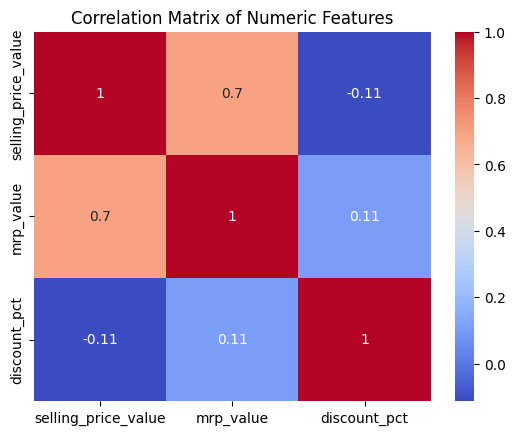

In [29]:
# Check relationships among numeric features like price, discount, and maybe date-derived features.
import numpy as np

numeric_cols = ['selling_price_value', 'mrp_value', 'discount_pct']
corr = data[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

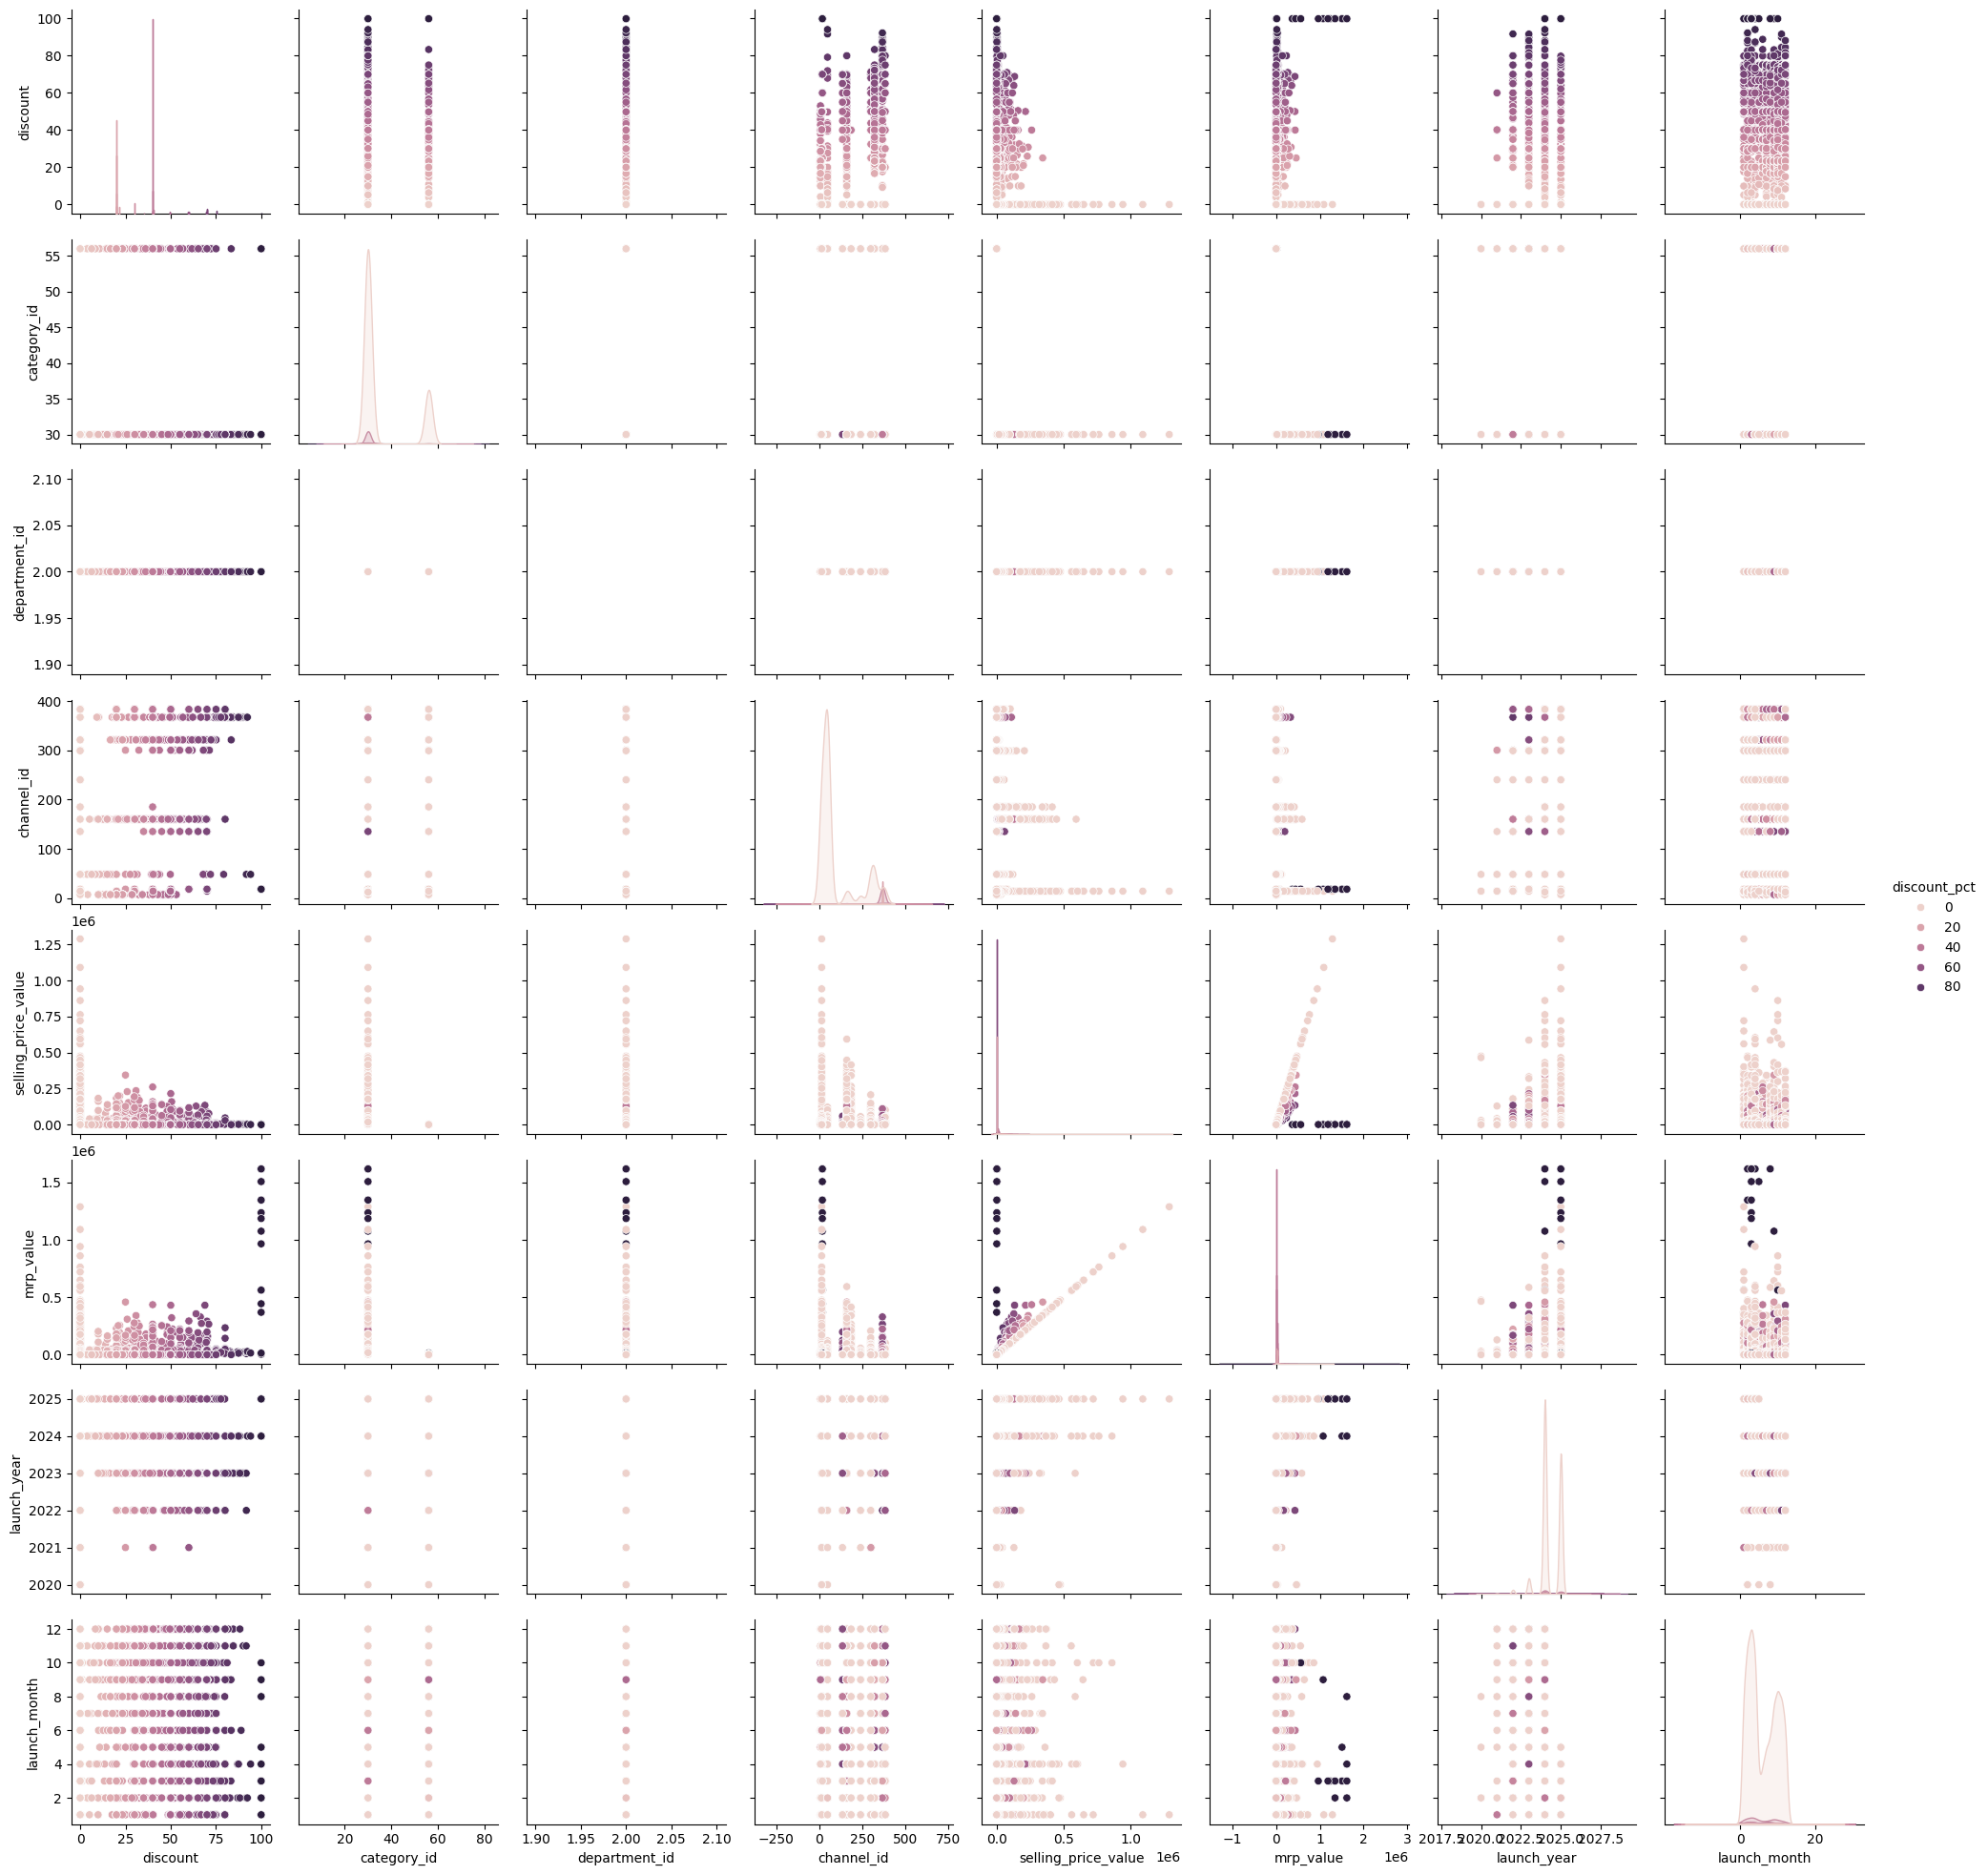

In [30]:
sns.pairplot(data=data, hue='discount_pct')
plt.show()

### **WordCloud from Description**
Quickly grasp common product description terms

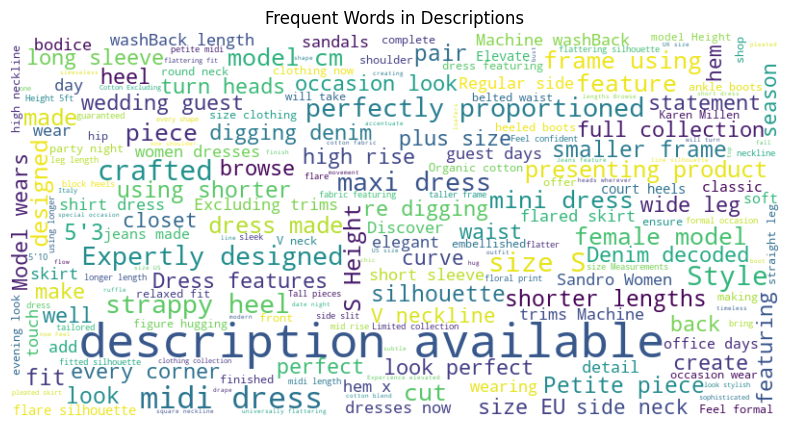

In [31]:
from wordcloud import WordCloud

text = ' '.join(data['description'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Words in Descriptions")
plt.show()


C:\Users\satya\AppData\Local\Temp\ipykernel_13476\3469740628.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(feat_names), x=list(feat_vals), palette='viridis')


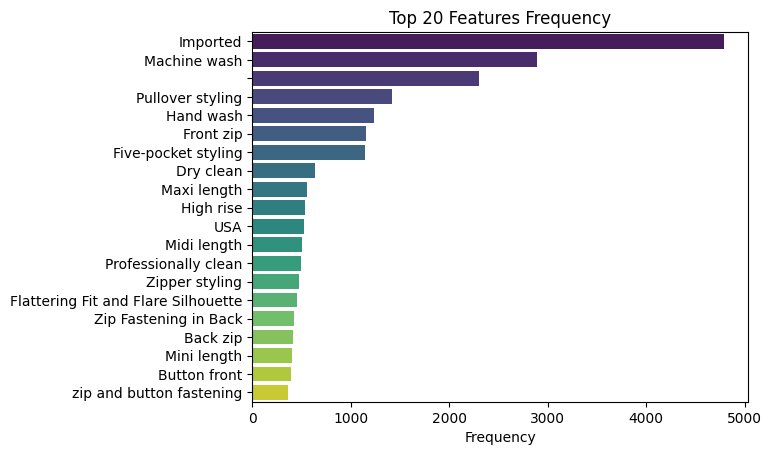

In [32]:
# Top Features Frequency (from feature_list)
# Analyze most common features mentioned (requires processing).
from collections import Counter
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Define a safe function for literal evaluation
def safe_literal_eval(x):
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        else:
            return [] # Return empty list for non-string values (like NaN)
    except (ValueError, SyntaxError):
        return [] # Return empty list for invalid strings

# Apply the safe function to the 'feature_list' column
features = data['feature_list'].apply(safe_literal_eval).tolist()
all_features = [item for sublist in features for item in sublist]

# Count frequency
feature_counts = Counter(all_features)
top_features = feature_counts.most_common(20)

# Plot
feat_names, feat_vals = zip(*top_features)
sns.barplot(y=list(feat_names), x=list(feat_vals), palette='viridis')
plt.title('Top 20 Features Frequency')
plt.xlabel('Frequency')
plt.show()

* "Imported", "Machine wash", and "Pullover styling" are the most frequently mentioned features.

* Features related to care instructions (e.g., Hand wash, Dry clean) and clothing styles (e.g., Front zip, Maxi length, Zipper styling) are also common.